In [1]:
# Warning: please change the path of csv files before you run the code
# Warning: please make sure your version of Python and Python package are satisfied with requirement.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime
print(datetime.datetime.now())

2021-11-29 16:38:49.840286


## Read data from local (please change the path of csvs)

In [4]:
property_2016 = pd.read_csv('../data/properties_2016.csv')
property_2016.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
property_2017 = pd.read_csv('../data/properties_2017.csv')
property_2017.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


## Prepare raw dataset from Kaggle data

In [6]:
df = pd.concat([property_2016, property_2017], axis = 0)
df.shape

(5970434, 58)

### drop two columns which have linear relationship with y value (prediction)

In [7]:
df.drop(['structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'], axis = 1, inplace = True)
df.shape

(5970434, 56)

In [8]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [9]:
df['assessmentyear'].value_counts()

2016.0    2978602
2015.0    2974762
2014.0       2596
2012.0         52
2004.0         12
2013.0          8
2003.0          6
2001.0          6
2010.0          4
2009.0          4
2005.0          4
2011.0          2
2002.0          2
2000.0          2
Name: assessmentyear, dtype: int64

In [10]:
# only use the latest data
df = df[df['assessmentyear'] == 2016]
df.drop('assessmentyear', axis = 1, inplace = True)

In [11]:
df.shape

(2978602, 55)

In [12]:
# y value: taxvaluedollarcn
# remove nan of y value
df = df[df['taxvaluedollarcnt'].notnull()]
df.shape

(2947573, 55)

In [13]:
df = df[df['taxvaluedollarcnt'] > 10000]
df.shape

(2933041, 55)

In [14]:
df['y'] = df['taxvaluedollarcnt']
df.drop('taxvaluedollarcnt', axis = 1, inplace = True)
df.shape

(2933041, 55)

In [15]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

# EDA

In [16]:
# remove
df['propertyzoningdesc'].value_counts()

LAR1          274849
LAR3           66739
LARS           54846
LBR1N          52738
LAR2           48746
               ...  
LCR1200000         1
1DM*               1
MPP1*              1
LCR2-C3*           1
TORC-GEN           1
Name: propertyzoningdesc, Length: 5610, dtype: int64

In [17]:
# remove
df['rawcensustractandblock'].value_counts()

6.059052e+07    1567
6.037920e+07    1453
6.059063e+07     895
6.037137e+07     886
6.059052e+07     838
                ... 
6.059012e+07       1
6.037911e+07       1
6.059074e+07       1
6.037210e+07       1
6.037533e+07       1
Name: rawcensustractandblock, Length: 98796, dtype: int64

In [18]:
# remove
df['censustractandblock'].value_counts()

6.037920e+13    1171
6.037137e+13     881
6.037920e+13     807
6.059063e+13     807
6.059052e+13     806
                ... 
6.037900e+13       1
6.037405e+13       1
6.037900e+13       1
6.059022e+13       1
6.037910e+13       1
Name: censustractandblock, Length: 96571, dtype: int64

In [19]:
# remove
df['regionidneighborhood'].value_counts()

118208.0    32207
268496.0    23107
48570.0     21177
27080.0     18844
54300.0     17622
            ...  
764146.0        4
275287.0        3
764092.0        3
275855.0        3
273552.0        1
Name: regionidneighborhood, Length: 529, dtype: int64

In [20]:
print('before drop: ', df.shape)
df.drop(['parcelid', 'propertycountylandusecode', 'propertyzoningdesc', 'rawcensustractandblock',
         'censustractandblock', 'regionidneighborhood'], axis = 1, inplace = True)
print('after drop: ', df.shape)

before drop:  (2933041, 55)
after drop:  (2933041, 49)


In [21]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("==================================")

airconditioningtypeid
1.0     743643
13.0     58459
5.0       8790
9.0       1904
11.0      1818
12.0        59
3.0          7
Name: airconditioningtypeid, dtype: int64
architecturalstyletypeid
7.0     5251
8.0      380
2.0      201
21.0     150
3.0       58
5.0       19
27.0       1
10.0       1
Name: architecturalstyletypeid, dtype: int64
basementsqft
1528.0    25
240.0     21
700.0     21
100.0     18
360.0     15
          ..
1453.0     1
1460.0     1
1462.0     1
1464.0     1
1391.0     1
Name: basementsqft, Length: 749, dtype: int64
bathroomcnt
2.00     1218979
3.00      632646
1.00      498282
2.50      208655
4.00      133700
0.00       67209
1.50       45723
5.00       38432
3.50       31820
4.50       19862
6.00       16353
5.50        6269
7.00        6195
8.00        4525
6.50        1352
9.00        1329
10.00        491
7.50         385
12.00        264
11.00        199
8.50         113
13.00         53
9.50          50
14.00         39
16.00         23
15.00         19
0

12447.0    665629
46298.0     92252
16764.0     58785
52650.0     58131
25218.0     56096
            ...  
27512.0        12
36078.0        12
47913.0         7
3980.0          6
40633.0         3
Name: regionidcity, Length: 186, dtype: int64
regionidcounty
3101.0    1981216
1286.0     734819
2061.0     217006
Name: regionidcounty, dtype: int64
regionidzip
96987.0    22022
96193.0    21505
97118.0    20502
97319.0    20121
96964.0    19607
           ...  
96953.0        1
96034.0        1
96313.0        1
97096.0        1
96988.0        1
Name: regionidzip, Length: 402, dtype: int64
roomcnt
0.0     2266792
6.0      178504
7.0      156617
8.0      120421
5.0       99673
9.0       45379
4.0       42905
10.0      10887
3.0        6232
11.0       3042
12.0       1114
2.0         745
13.0        320
14.0        157
1.0          77
15.0         69
16.0         35
18.0         22
30.0         14
17.0         10
19.0          6
21.0          4
20.0          3
22.0          1
24.0          1


In [22]:
cat_col = ['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid', 'buildingqualitytypeid',
           'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt', 'poolsizesum', 
           'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'regionidcounty', 
           'storytypeid', 'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag']

numeric_col = ['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 
               'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 
               'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 
               'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 
               'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 
               'yearbuilt', 'numberofstories', 'regionidcity', 'taxamount', 'taxdelinquencyyear', 'regionidzip']

In [23]:
print('length of category column: ', len(cat_col))

length of category column:  19


In [24]:
print('length of numeric column: ', len(numeric_col))

length of numeric column:  29


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933041 entries, 1530043 to 2982283
Data columns (total 49 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   airconditioningtypeid         float64
 1   architecturalstyletypeid      float64
 2   basementsqft                  float64
 3   bathroomcnt                   float64
 4   bedroomcnt                    float64
 5   buildingclasstypeid           float64
 6   buildingqualitytypeid         float64
 7   calculatedbathnbr             float64
 8   decktypeid                    float64
 9   finishedfloor1squarefeet      float64
 10  calculatedfinishedsquarefeet  float64
 11  finishedsquarefeet12          float64
 12  finishedsquarefeet13          float64
 13  finishedsquarefeet15          float64
 14  finishedsquarefeet50          float64
 15  finishedsquarefeet6           float64
 16  fips                          float64
 17  fireplacecnt                  float64
 18  fullbathcnt     

In [26]:
df.reset_index(inplace = True, drop = True)

## Data cleaning: Numeric columns   
(1) drop columns which have more than 90% of missing values.   
(2) fill nan values with mean values of each columns.

In [27]:
cat_property = df[cat_col]
numeric_property = df[numeric_col]

In [28]:
total = numeric_property.isnull().sum().sort_values(ascending=False)
percent = (numeric_property.isnull().sum()/numeric_property.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(31)

,Total,Percent
basementsqft,2931423,0.999448
yardbuildingsqft26,2930400,0.999100
finishedsquarefeet13,2929602,0.998827
finishedsquarefeet6,2911722,0.992731
taxdelinquencyyear,2876813,0.980829
yardbuildingsqft17,2851473,0.972190
finishedsquarefeet15,2743399,0.935343
finishedfloor1squarefeet,2729381,0.930564
finishedsquarefeet50,2729381,0.930564
fireplacecnt,2620047,0.893287


In [29]:
# remove the columns the percentage of null value of which is larger than 90%
df.drop(['basementsqft', 'yardbuildingsqft26', 'finishedsquarefeet13', 'finishedsquarefeet6',
        'taxdelinquencyyear', 'yardbuildingsqft17', 'finishedsquarefeet15', 'finishedfloor1squarefeet',
        'finishedsquarefeet50'], axis = 1, inplace = True)

In [30]:
numeric_col = []
for col in df.columns:
    if col not in cat_col:
        numeric_col.append(col)
print(numeric_col)

['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yearbuilt', 'numberofstories', 'taxamount', 'y']


In [31]:
numeric_property = df[numeric_col]
total = numeric_property.isnull().sum().sort_values(ascending=False)
percent = (numeric_property.isnull().sum()/numeric_property.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
fireplacecnt,2620047,0.893287
threequarterbathnbr,2616859,0.892200
numberofstories,2247817,0.766378
garagecarcnt,2042368,0.696331
garagetotalsqft,2042368,0.696331


In [32]:
# replace null with mean value
df[numeric_col] = df[numeric_col].fillna(df[numeric_col].mean())

In [33]:
numeric_property = df[numeric_col]
total = numeric_property.isnull().sum().sort_values(ascending=False)
percent = (numeric_property.isnull().sum()/numeric_property.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
y,0,0.0
latitude,0,0.0
bedroomcnt,0,0.0
calculatedbathnbr,0,0.0
calculatedfinishedsquarefeet,0,0.0


In [34]:
len(numeric_col)

21

## Category columns

In [35]:
cat_property = df[cat_col]
total = cat_property.isnull().sum().sort_values(ascending=False)
percent = (cat_property.isnull().sum()/cat_property.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(len(cat_col))

,Total,Percent
storytypeid,2931427,0.999450
fireplaceflag,2927878,0.998240
architecturalstyletypeid,2926980,0.997934
typeconstructiontypeid,2926295,0.997700
buildingclasstypeid,2920381,0.995684
pooltypeid10,2916046,0.994206
decktypeid,2915671,0.994078
poolsizesum,2905086,0.990469
pooltypeid2,2899989,0.988731
hashottuborspa,2882994,0.982937


BuildingClassTypeID  
1	Buildings having fireproofed structural steel frames carrying all wall, floor and roof loads. Wall, floor and roof structures are built of non-combustible materials.  
2	Buildings having fireproofed reinforced concrete frames carrying all wall floor and roof loads which are all non-combustible.  
3	Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.  
4	Buildings having wood or wood and steel frames  
5	Specialized buildings that do not fit in any of the above categories!  

In [36]:
# not an important feature - remove
df.drop(['buildingclasstypeid'], axis = 1, inplace = True)

In [37]:
cat_col.remove('buildingclasstypeid')
cat_col

['airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'fips',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'regionidcounty',
 'storytypeid',
 'typeconstructiontypeid',
 'fireplaceflag',
 'taxdelinquencyflag']

In [38]:
# 7: Basement
df['storytypeid'].value_counts()
df.drop(['storytypeid'], axis = 1, inplace = True)
cat_col.remove('storytypeid')

In [39]:
# replace binary column with False/0
# remove other category columns

tmp_col = ['architecturalstyletypeid', 'typeconstructiontypeid', 'decktypeid', 'pooltypeid10', 'poolsizesum', 
          'pooltypeid2', 'hashottuborspa', 'taxdelinquencyflag']
for i in tmp_col:
    print(df[i].value_counts())

7.0     5251
8.0      380
2.0      201
21.0     150
3.0       58
5.0       19
27.0       1
10.0       1
Name: architecturalstyletypeid, dtype: int64
6.0     6669
4.0       59
13.0      14
10.0       3
11.0       1
Name: typeconstructiontypeid, dtype: int64
66.0    17370
Name: decktypeid, dtype: int64
1.0    16995
Name: pooltypeid10, dtype: int64
450.0     3178
400.0      972
480.0      917
500.0      828
512.0      826
          ... 
1090.0       1
1094.0       1
1116.0       1
1121.0       1
1142.0       1
Name: poolsizesum, Length: 907, dtype: int64
1.0    33052
Name: pooltypeid2, dtype: int64
True    50047
Name: hashottuborspa, dtype: int64
Y    56226
Name: taxdelinquencyflag, dtype: int64


In [40]:
df.drop(['architecturalstyletypeid', 'typeconstructiontypeid', 'decktypeid', 'poolsizesum'], axis = 1, inplace = True)
df.shape

(2933041, 34)

In [41]:
cat_col = []
for item in df.columns:
    if item not in numeric_col:
        cat_col.append(item)

In [42]:
for i in range(0, len(cat_col)):
    column_name = cat_col[i]
    print(df[column_name].value_counts())

1.0     743643
13.0     58459
5.0       8790
9.0       1904
11.0      1818
12.0        59
3.0          7
Name: airconditioningtypeid, dtype: int64
6.0     561308
8.0     501859
4.0     447615
7.0     189546
5.0     106912
9.0      69411
11.0     28487
3.0      17815
10.0     10567
12.0      4117
1.0       1717
2.0        288
Name: buildingqualitytypeid, dtype: int64
6037.0    1981216
6059.0     734819
6111.0     217006
Name: fips, dtype: int64
True    50047
Name: hashottuborspa, dtype: int64
2.0     1167677
7.0      645027
6.0       27476
24.0      21075
20.0       3622
13.0       1342
18.0        586
1.0         262
14.0         41
10.0         39
12.0         25
11.0         16
21.0          3
19.0          1
Name: heatingorsystemtypeid, dtype: int64
1.0    539346
Name: poolcnt, dtype: int64
1.0    16995
Name: pooltypeid10, dtype: int64
1.0    33052
Name: pooltypeid2, dtype: int64
1.0    505613
Name: pooltypeid7, dtype: int64
261.0    2148455
266.0     482624
246.0     114097
269.0  

In [43]:
# 5 stands for None
df['airconditioningtypeid'].fillna(5, inplace = True)
df['airconditioningtypeid'].value_counts()

5.0     2127151
1.0      743643
13.0      58459
9.0        1904
11.0       1818
12.0         59
3.0           7
Name: airconditioningtypeid, dtype: int64

In [44]:
# buildingqualitytypeid: Overall assessment of condition of the building from best (lowest) to worst (highest)
df['buildingqualitytypeid'].fillna(df['buildingqualitytypeid'].mode()[0], inplace = True)
df['buildingqualitytypeid'].value_counts()

6.0     1554707
8.0      501859
4.0      447615
7.0      189546
5.0      106912
9.0       69411
11.0      28487
3.0       17815
10.0      10567
12.0       4117
1.0        1717
2.0         288
Name: buildingqualitytypeid, dtype: int64

In [45]:
df['fips'].fillna(df['fips'].mode()[0], inplace = True)
df['fips'].value_counts()

6037.0    1981216
6059.0     734819
6111.0     217006
Name: fips, dtype: int64

In [46]:
df['hashottuborspa'].fillna(False, inplace = True)
df['hashottuborspa'].value_counts()

False    2882994
True       50047
Name: hashottuborspa, dtype: int64

In [47]:
# 13 stands for None
df['heatingorsystemtypeid'].fillna(13, inplace = True)
df['heatingorsystemtypeid'].value_counts()

2.0     1167677
13.0    1067191
7.0      645027
6.0       27476
24.0      21075
20.0       3622
18.0        586
1.0         262
14.0         41
10.0         39
12.0         25
11.0         16
21.0          3
19.0          1
Name: heatingorsystemtypeid, dtype: int64

In [48]:
for item in ['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'fireplaceflag', 'taxdelinquencyflag']:
    df[item].fillna(0, inplace = True)

In [49]:
# 261: SFR
df['propertylandusetypeid'].fillna(261, inplace = True)
df['propertylandusetypeid'].value_counts()

261.0    2148455
266.0     482624
246.0     114097
269.0      59755
248.0      40471
247.0      39795
263.0      18572
31.0        9437
265.0       9415
47.0        4330
260.0       2807
267.0       1806
275.0       1218
264.0        258
279.0          1
Name: propertylandusetypeid, dtype: int64

In [50]:
df['regionidcity'].fillna(df['regionidcity'].mode()[0], inplace = True)
df['regionidcounty'].fillna(df['regionidcounty'].mode()[0], inplace = True)
df['regionidzip'].fillna(df['regionidzip'].mode()[0], inplace = True)

In [51]:
cat_property = df[cat_col]
total = cat_property.isnull().sum().sort_values(ascending=False)
percent = (cat_property.isnull().sum()/cat_property.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
taxdelinquencyflag,0,0.0
fireplaceflag,0,0.0
regionidcounty,0,0.0
propertylandusetypeid,0,0.0
pooltypeid7,0,0.0


In [52]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
y,0,0.0
fireplacecnt,0,0.0
latitude,0,0.0
heatingorsystemtypeid,0,0.0
hashottuborspa,0,0.0


In [53]:
len(cat_col)

13

In [57]:
df.shape

(2933041, 34)

## Data analysis

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

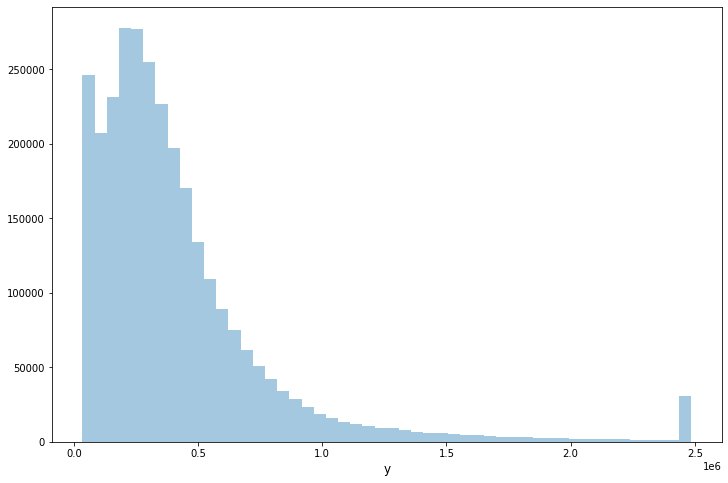

In [54]:
# y value distribution
ulimit = np.percentile(df.y.values, 99)
llimit = np.percentile(df.y.values, 1)
df['y'].iloc[df['y']>ulimit] = ulimit
df['y'].iloc[df['y']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df.y.values, bins=50, kde=False)
plt.xlabel('y', fontsize=12)
plt.show()

<Figure size 864x864 with 0 Axes>

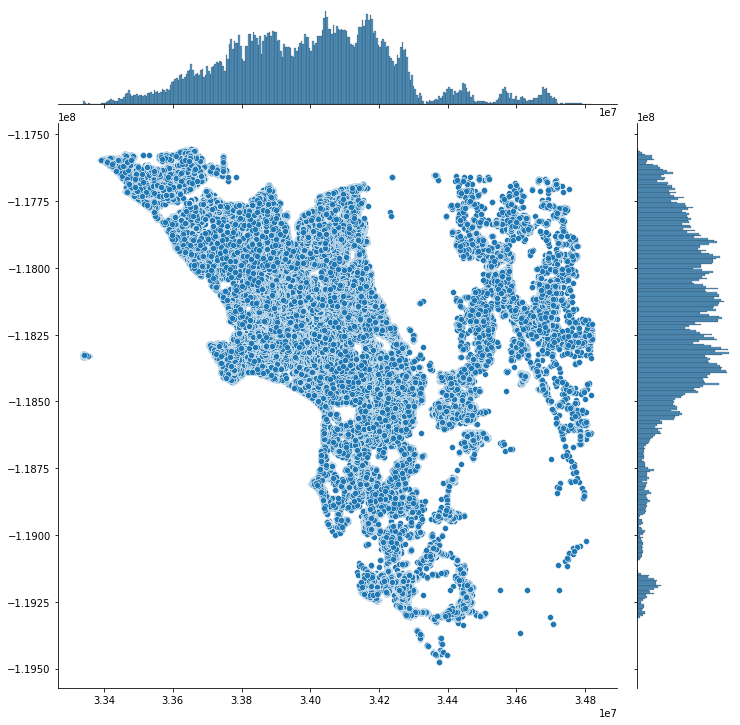

In [56]:
# longtitude and latitude
# From the data page, we are provided with a full list of real estate properties in three counties 
# (Los Angeles, Orange and Ventura, California) data in 2016.
plt.figure(figsize=(12,12))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
# plt.legend()
plt.show()

<AxesSubplot:>

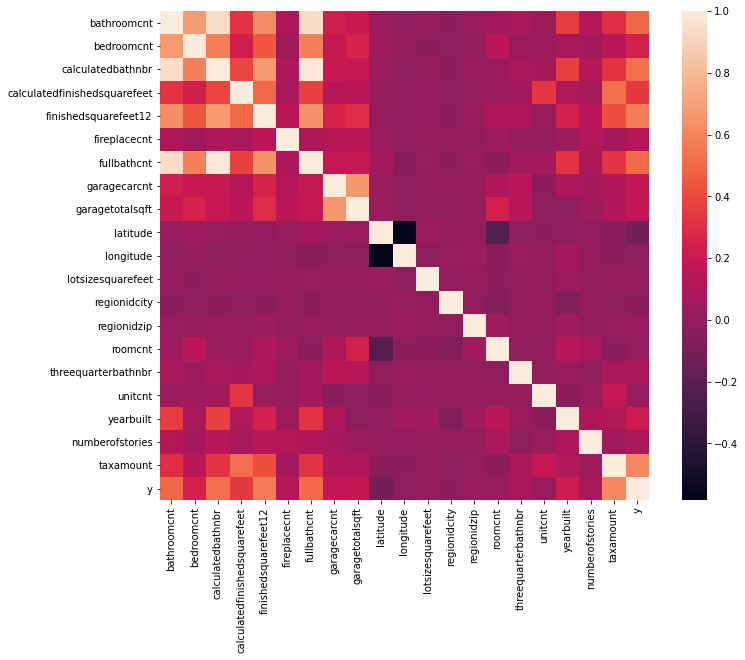

In [57]:
#correlation matrix for numeric df
numeric_property = df[numeric_col]
corrmat = numeric_property.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)

<AxesSubplot:>

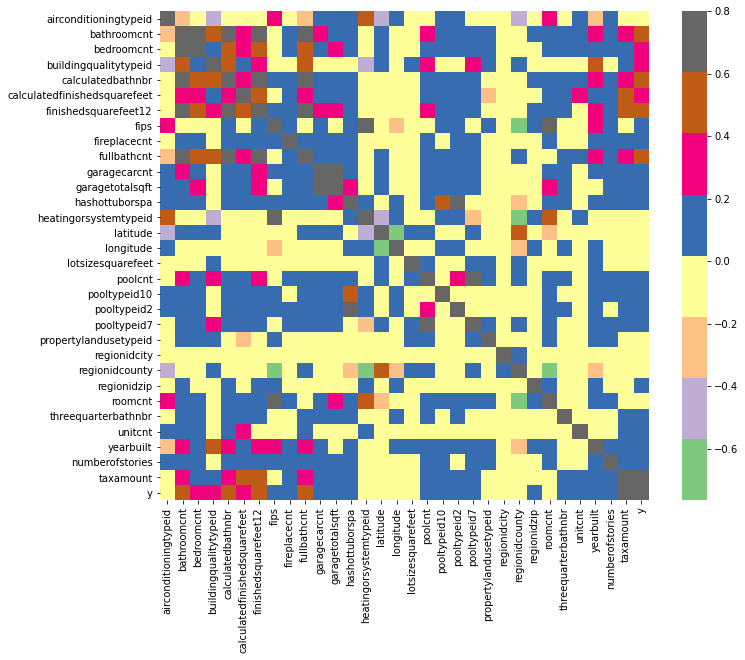

In [58]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap = "Accent")

According to the crystal ball, these are ten variables most correlated with 'y value'.  
Tax amount and finishedsqaurefeet12 are two of the most columns which are closest related to house price.       
It is reasonable because the house price will be larger if the tax amount is higher or finished sqft of the houses is  larger.   

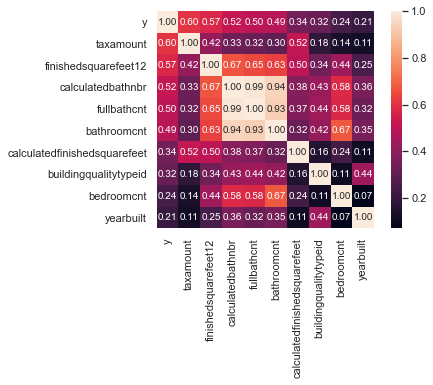

In [59]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()